In [ ]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import initializers
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = x_train.shape[1:]
x_train = (x_train.reshape(-1, img_rows*img_cols, 1).astype(np.float32) - 127.5) / 127.5

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def discriminator_model(dropout=0.5):
  model = Sequential()
  model.add(Dense(1024, input_dim = 784, kernel_initializer = initializers.RandomNormal(stddev=0.02)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(dropout))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(dropout))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(dropout))
  model.add(Dense(1, activation = 'sigmoid'))
  opt = Adam(learning_rate = 0.0001)
  model.compile(loss = 'binary_crossentropy', optimizer = opt)
  return model

In [ ]:
def generator_model():
  model = Sequential()
  model.add(Dense(256, input_dim = 100, kernel_initializer = initializers.RandomNormal(stddev = 0.02)))
  model.add(LeakyReLU(0.2))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(Dense(784, activation = 'tanh'))
  opt = Adam(learning_rate = 0.00005)
  model.compile(loss = 'binary_crossentropy', optimizer = opt)
  return model


In [ ]:
discriminator = discriminator_model()
generator = generator_model()
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs = gan_input, outputs = gan_output)
opt = Adam(learning_rate = 0.0001)
gan.compile(loss = 'binary_crossentropy', optimizer = opt)

In [ ]:
def plot_images(samples = 16, step = 0):
  plt.figure(figsize = (5,5))
  for i in range(samples):
    noise = np.random.uniform(-1, 1, size = [batch_size, 100])
    images = generator.predict(noise)
    plt.subplot(4, 4, i+1)
    image = images[i, :,]
    image = np.reshape(image, [img_rows, img_cols])
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')
  plt.show()

In [ ]:
batch_size = 500
n_steps = 100000
plot_every = 100

16/16 [==============================] - 0s 2ms/step
Step 0 
16/16 [==============================] - 0s 2ms/step


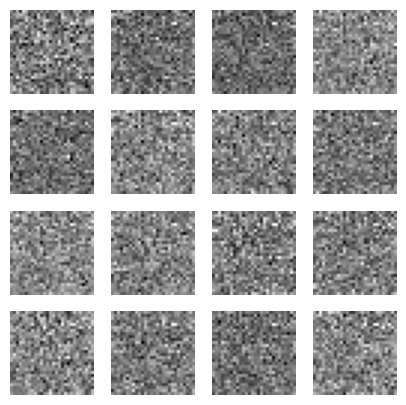

16/16 [==============================] - 0s 2ms/step
Step 100 
16/16 [==============================] - 0s 2ms/step


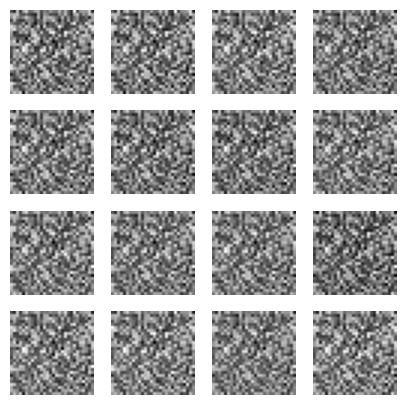

16/16 [==============================] - 0s 2ms/step
Step 200 
16/16 [==============================] - 0s 2ms/step


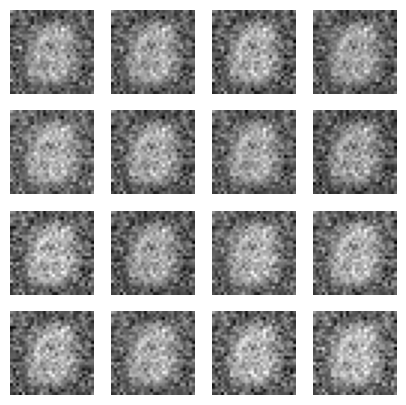

16/16 [==============================] - 0s 2ms/step
Step 300 
16/16 [==============================] - 0s 2ms/step


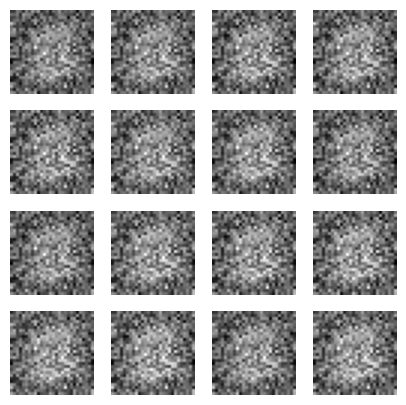

16/16 [==============================] - 0s 2ms/step
Step 400 
16/16 [==============================] - 0s 2ms/step


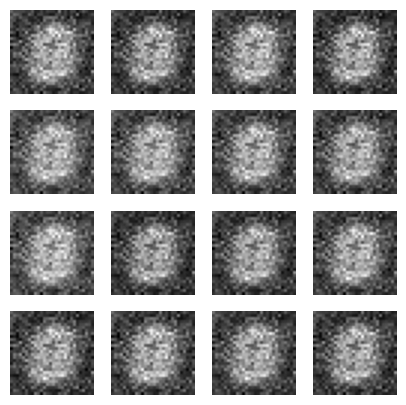

16/16 [==============================] - 0s 2ms/step
Step 500 
16/16 [==============================] - 0s 2ms/step


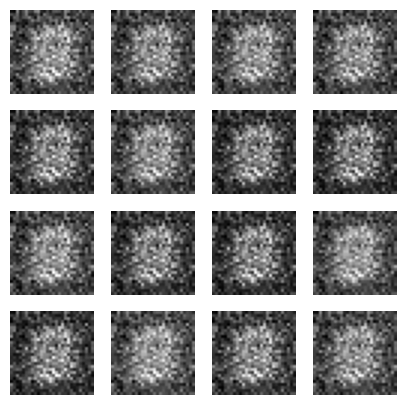

16/16 [==============================] - 0s 3ms/step


In [ ]:
noise_input = np.random.uniform(-1, 1, size = [16, 100])
for step in range(n_steps):

  noise = np.random.uniform(-1, 1, size = [batch_size, 100])
  batch = x_train[np.random.randint(0, x_train.shape[0], size = batch_size)].reshape(batch_size, 784)

  gen_output = generator.predict(noise)
  x = np.concatenate([batch, gen_output])

  y_D = np.zeros(2*batch_size)
  y_D[:batch_size] = 1

  discriminator.trainable = True
  loss_D = discriminator.train_on_batch(x, y_D)

  noise = np.random.uniform(-1, 1, size = [batch_size, 100])
  y_G = np.ones(batch_size)
  discriminator.trainable = False
  loss_G = gan.train_on_batch(noise, y_G)

  if step % plot_every == 0:
    print('Step {} '.format(step))
    plot_images(samples = noise_input.shape[0], step = (step+1))